In [1]:
from deephyp import data
import deephyp
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
mydata = np.load('B73heat.npy')

In [3]:
mydata.shape

(1675, 390, 290)

In [ ]:
hypData = data.HypImg(mydata)
hypData.pre_process('minmax')

In [121]:
from deephyp import autoencoder
net = autoencoder.mlp_1D_network(inputSize=hypData.numBands)
net.add_train_op( name='experiment_1')

In [124]:
hypData.spectraPrep.shape

(52500, 243)

In [125]:
dataTrain = data.Iterator( dataSamples=hypData.spectraPrep[:50000, :], targets=hypData.spectraPrep[:50000, :], batchSize=10)
dataVal = data.Iterator( dataSamples=hypData.spectraPrep[50001:52500, :], targets=hypData.spectraPrep[50001:52500, :])

In [126]:
net.train(dataTrain=dataTrain, dataVal=dataVal, train_op_name='experiment_1', n_epochs=100, save_addr='model_directory/', visualiseRateTrain=5, visualiseRateVal=10, save_epochs=[50,100])

epoch: 0, training loss: 0.0298186
epoch: 0, validation loss: 1.33026
epoch: 5, training loss: 0.00509942
epoch: 10, training loss: 0.00406669
epoch: 10, validation loss: 0.934225
epoch: 15, training loss: 0.00393704
epoch: 20, training loss: 0.00384976
epoch: 20, validation loss: 0.867635
epoch: 25, training loss: 0.00375495
epoch: 30, training loss: 0.00370069
epoch: 30, validation loss: 0.895204
epoch: 35, training loss: 0.00359225
epoch: 40, training loss: 0.00338449
epoch: 40, validation loss: 0.767521
epoch: 45, training loss: 0.00329367
epoch: 50, training loss: 0.00320224
epoch: 50, validation loss: 0.734215
epoch: 55, training loss: 0.00311151
epoch: 60, training loss: 0.00306689
epoch: 60, validation loss: 0.710989
epoch: 65, training loss: 0.00303476
epoch: 70, training loss: 0.00292441
epoch: 70, validation loss: 0.666986
epoch: 75, training loss: 0.00279974
epoch: 80, training loss: 0.00269479
epoch: 80, validation loss: 0.626635
epoch: 85, training loss: 0.00263131
epoch:

In [127]:
net.add_model(addr='model_directory/epoch_100/', modelName='csa_100')
dataZ = net.encoder(modelName='csa_100', dataSamples=hypData.spectraPrep )
dataY = net.decoder(modelName='csa_100', dataZ=dataZ)
imgZ = np.reshape(dataZ, (hypData.numRows, hypData.numCols, -1))
imgY = np.reshape(dataY, (hypData.numRows, hypData.numCols, -1))
imgX = np.reshape(hypData.spectraPrep, (hypData.numRows, hypData.numCols, -1))
colourImg = imgZ.copy()
colourImg = colourImg[ :,:,np.argsort(-np.std(np.std(colourImg, axis=0), axis=0))[:3] ]
colourImg /= np.max(np.max(colourImg, axis=0), axis=0)
plt.imsave("pre-35.png", colourImg)
rgb = colourImg * 255
gray = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

INFO:tensorflow:Restoring parameters from model_directory/epoch_100/model.ckpt
INFO:tensorflow:Restoring parameters from model_directory/epoch_100/model.ckpt


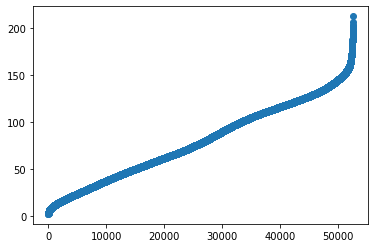

In [128]:
nlist = []
for i in gray:
    for j in i:
        nlist.append(j)
nlist.sort()

fig, ax = plt.subplots()
x = range(len(nlist))
y = nlist
ax.scatter(x, y)

In [116]:
def binary(pic):
	final = []
	myl = np.shape(pic)[0]
	myw = np.shape(pic)[1]
	for i in pic:
		n = []
		for j in i:
			# only for each pixel that greater than 0.25 were converted to whole white pixel, while pixel value less than that was converted to black
			if j >150 1:
				t = 255
			else:
				t = 0
			n.append(t)
		final.append(n)
	final = np.array(final)	
	return final

In [117]:
final = binary(gray)
plt.imsave("mid-35.png", final)

In [98]:
def convert(pic):
	final = []
	myl = np.shape(pic)[0]
	myw = np.shape(pic)[1]
	for i in pic:
		n = []
		for j in i:
			# only for each pixel that greater than 0.25 were converted to whole white pixel, while pixel value less than that was converted to black
			if j > 160:
				t = 1
			else:
				t = 0.1
			n.append(t)
		final.append(n)
	final = np.array(final)	
	return final

In [99]:
mid = convert(gray)

In [100]:
mf = []
for x,i in zip(mydata,mid):
    n = []
    for y,j in zip(x,i):
        z = y*j
        n.append(z)
    mf.append(n)
mf = np.array(mf)

In [101]:
hypData = data.HypImg(mf)
hypData.pre_process('minmax')

In [102]:
from deephyp import autoencoder
net = autoencoder.mlp_1D_network(inputSize=hypData.numBands)
net.add_train_op( name='experiment_1')
dataTrain = data.Iterator( dataSamples=hypData.spectraPrep[:60000, :], targets=hypData.spectraPrep[:60000, :], batchSize=10)
dataVal = data.Iterator( dataSamples=hypData.spectraPrep[60001:85050, :], targets=hypData.spectraPrep[60001:85050, :])

In [103]:
net.train(dataTrain=dataTrain, dataVal=dataVal, train_op_name='experiment_1', n_epochs=100, save_addr='model_directory/', visualiseRateTrain=5, visualiseRateVal=10, save_epochs=[50,100])

epoch: 0, training loss: 0.0301754
epoch: 0, validation loss: 56.0784
epoch: 5, training loss: 0.00503051
epoch: 10, training loss: 0.0048862
epoch: 10, validation loss: 54.3191
epoch: 15, training loss: 0.00394659
epoch: 20, training loss: 0.00384495
epoch: 20, validation loss: 47.3563
epoch: 25, training loss: 0.00372763
epoch: 30, training loss: 0.00367646
epoch: 30, validation loss: 47.0075
epoch: 35, training loss: 0.00365022
epoch: 40, training loss: 0.00363443
epoch: 40, validation loss: 48.0484
epoch: 45, training loss: 0.00362074
epoch: 50, training loss: 0.0035906
epoch: 50, validation loss: 48.6826
epoch: 55, training loss: 0.0035479
epoch: 60, training loss: 0.00344193
epoch: 60, validation loss: 48.5986
epoch: 65, training loss: 0.0031961
epoch: 70, training loss: 0.00299158
epoch: 70, validation loss: 46.7683
epoch: 75, training loss: 0.00282143
epoch: 80, training loss: 0.00272907
epoch: 80, validation loss: 46.2352
epoch: 85, training loss: 0.0026724
epoch: 90, training

In [104]:
net.add_model(addr='model_directory/epoch_100/', modelName='csa_100')
dataZ = net.encoder(modelName='csa_100', dataSamples=hypData.spectraPrep)
dataY = net.decoder(modelName='csa_100', dataZ=dataZ)
imgZ = np.reshape(dataZ, (hypData.numRows, hypData.numCols, -1))
imgY = np.reshape(dataY, (hypData.numRows, hypData.numCols, -1))
imgX = np.reshape(hypData.spectraPrep, (hypData.numRows, hypData.numCols, -1))
colourImg = imgZ.copy()
colourImg = colourImg[ :,:,np.argsort(-np.std(np.std(colourImg, axis=0), axis=0))[:3] ]
colourImg /= np.max(np.max(colourImg, axis=0), axis=0)
plt.imsave("35-post.png", colourImg)

INFO:tensorflow:Restoring parameters from model_directory/epoch_100/model.ckpt
INFO:tensorflow:Restoring parameters from model_directory/epoch_100/model.ckpt


In [87]:
#test = colourImg * 255
#myImg = test.astype('uint8')
#plt.imsave("test.png", myImg)

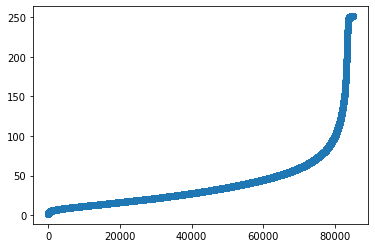

In [51]:
fig, ax = plt.subplots()
x = range(len(nlist))
y = nlist
ax.scatter(x, y)

In [52]:
plt.imsave("test.png", final)